In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle

%matplotlib inline

In [3]:
images = glob.glob("camera_cal\*.jpg")

img_shape = None

In [43]:
objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

objpoints = [] #3d points in real world space
imgpoints = [] #2d points in image space


for each in images:

    image = mpimg.imread(each)

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    img_shape = gray.shape[::-1]
    
    if ret:
        print("Ret Baby!", " ", each)
        imgpoints.append(corners)
        objpoints.append(objp)


Ret Baby!   camera_cal\calibration10.jpg
Ret Baby!   camera_cal\calibration11.jpg
Ret Baby!   camera_cal\calibration12.jpg
Ret Baby!   camera_cal\calibration13.jpg
Ret Baby!   camera_cal\calibration14.jpg
Ret Baby!   camera_cal\calibration15.jpg
Ret Baby!   camera_cal\calibration16.jpg
Ret Baby!   camera_cal\calibration17.jpg
Ret Baby!   camera_cal\calibration18.jpg
Ret Baby!   camera_cal\calibration19.jpg
Ret Baby!   camera_cal\calibration2.jpg
Ret Baby!   camera_cal\calibration20.jpg
Ret Baby!   camera_cal\calibration3.jpg
Ret Baby!   camera_cal\calibration6.jpg
Ret Baby!   camera_cal\calibration7.jpg
Ret Baby!   camera_cal\calibration8.jpg
Ret Baby!   camera_cal\calibration9.jpg


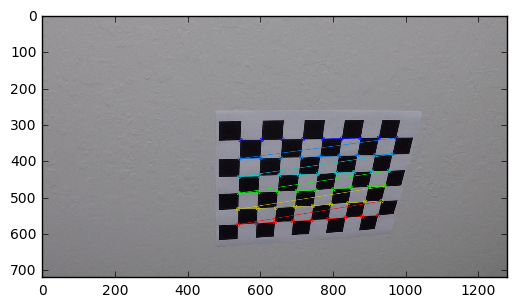

In [44]:
 plt.imshow(cv2.drawChessboardCorners(mpimg.imread("camera_cal\calibration10.jpg"), (9, 6), imgpoints[0], ret))

In [45]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, 
                                                   imgpoints, img_shape, None,None)

In [46]:
distortion_dump = {"mtx": mtx, 
                   "ret": ret, 
                   "rvecs": rvecs, 
                   "tvecs": tvecs, 
                   "dist": dist}

pickle.dump( distortion_dump, open( "distort.p", "wb" ) )